In [1]:
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns             
from sklearn.manifold import TSNE  # For t-SNE
import warnings
warnings.filterwarnings('ignore')

- Separating the data matrix from the class variable into data matrix as df and the column with class labels as y

In [2]:
df = pd.read_csv(
     'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', 
     header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [3]:
#Rename column names
df.columns = ["P" + str(i) for i in range(0, len(df.columns) - 1)] + ["y"]

#Select the rows where y is 1, 3 or 6
df = df.loc[df.y.isin([1, 3, 6])]

# Separates the attributes P0-P63 into X
X = df.filter(regex='\d')

# Fetches the class variable into y
y = df.y

In [4]:
# Shows the first few rows of the data
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


In [5]:
# t-SNE object with 2 components
tsne = TSNE(
    n_components=2,
    random_state=1)

# t-SNE parameters
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'warn',
 'learning_rate': 'warn',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 1,
 'square_distances': 'legacy',
 'verbose': 0}

- t-SNE with perplexity = 2

<AxesSubplot:>

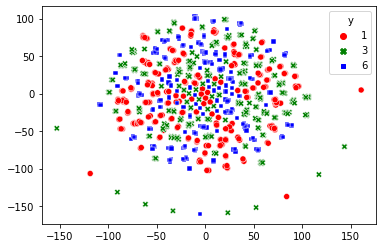

In [6]:
# Sets up t-SNE with perplexity = 2
tsne = TSNE(
    n_components=2,
    perplexity=1,
    random_state=1)

# Transforms the attribute data
X_tf = tsne.fit_transform(X)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=X_tf[:, 0],
    y=X_tf[:, 1],
    style=y,
    hue=y,
    palette=['red', 'green', 'blue'])

t-SNE with perplexity = 10

<AxesSubplot:>

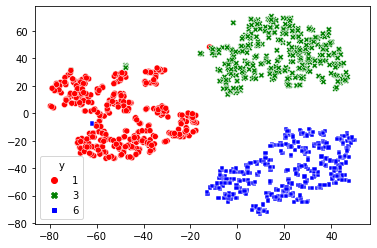

In [7]:
# Sets up t-SNE with perplexity = 10
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=1)

# Transforms the attribute data
X_tf = tsne.fit_transform(X)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=X_tf[:, 0],
    y=X_tf[:, 1],
    style=y,
    hue=y,
    palette=['red', 'green', 'blue'])